In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import generate_diro2c_explanation, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import print_rules, dt_feature_importance
from tasks.rashomon_example import make_task
from sklearn.model_selection import train_test_split

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

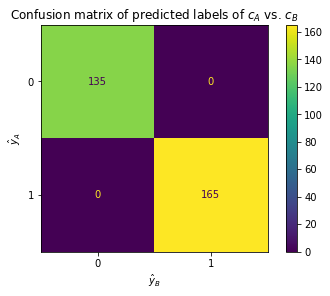

In [4]:
comparer.plot_confusion_matrix(X)

# Global explanations

In [5]:
mclass_diff = comparer.predict_mclass_diff(X)

## $(1,0)$

In [7]:
focus_class = '(1, 0)'

In [8]:
%%time
#X_sample, _ = train_test_split(X, train_size=0.1, random_state=0)
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          focus_class=focus_class, gn_population_size=200)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 16.5 s, sys: 148 ms, total: 16.7 s
Wall time: 17.3 s


In [9]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [10]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [16]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [17]:
feature_importances = dt_feature_importance(tree)
feature_order = np.flip(np.argsort(feature_importances))

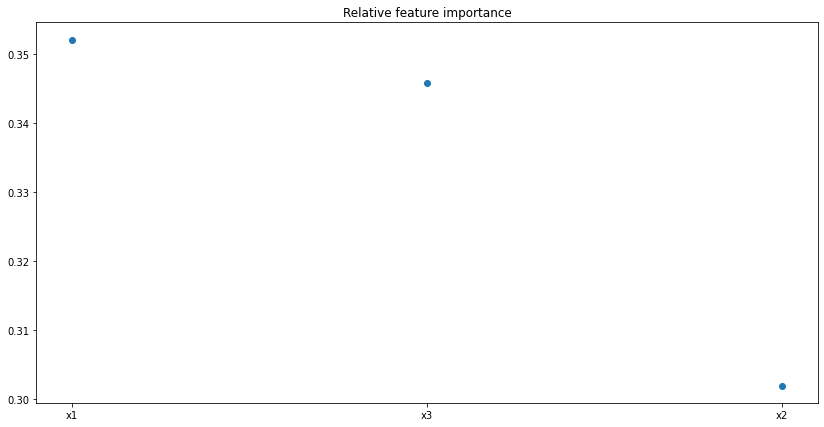

In [18]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

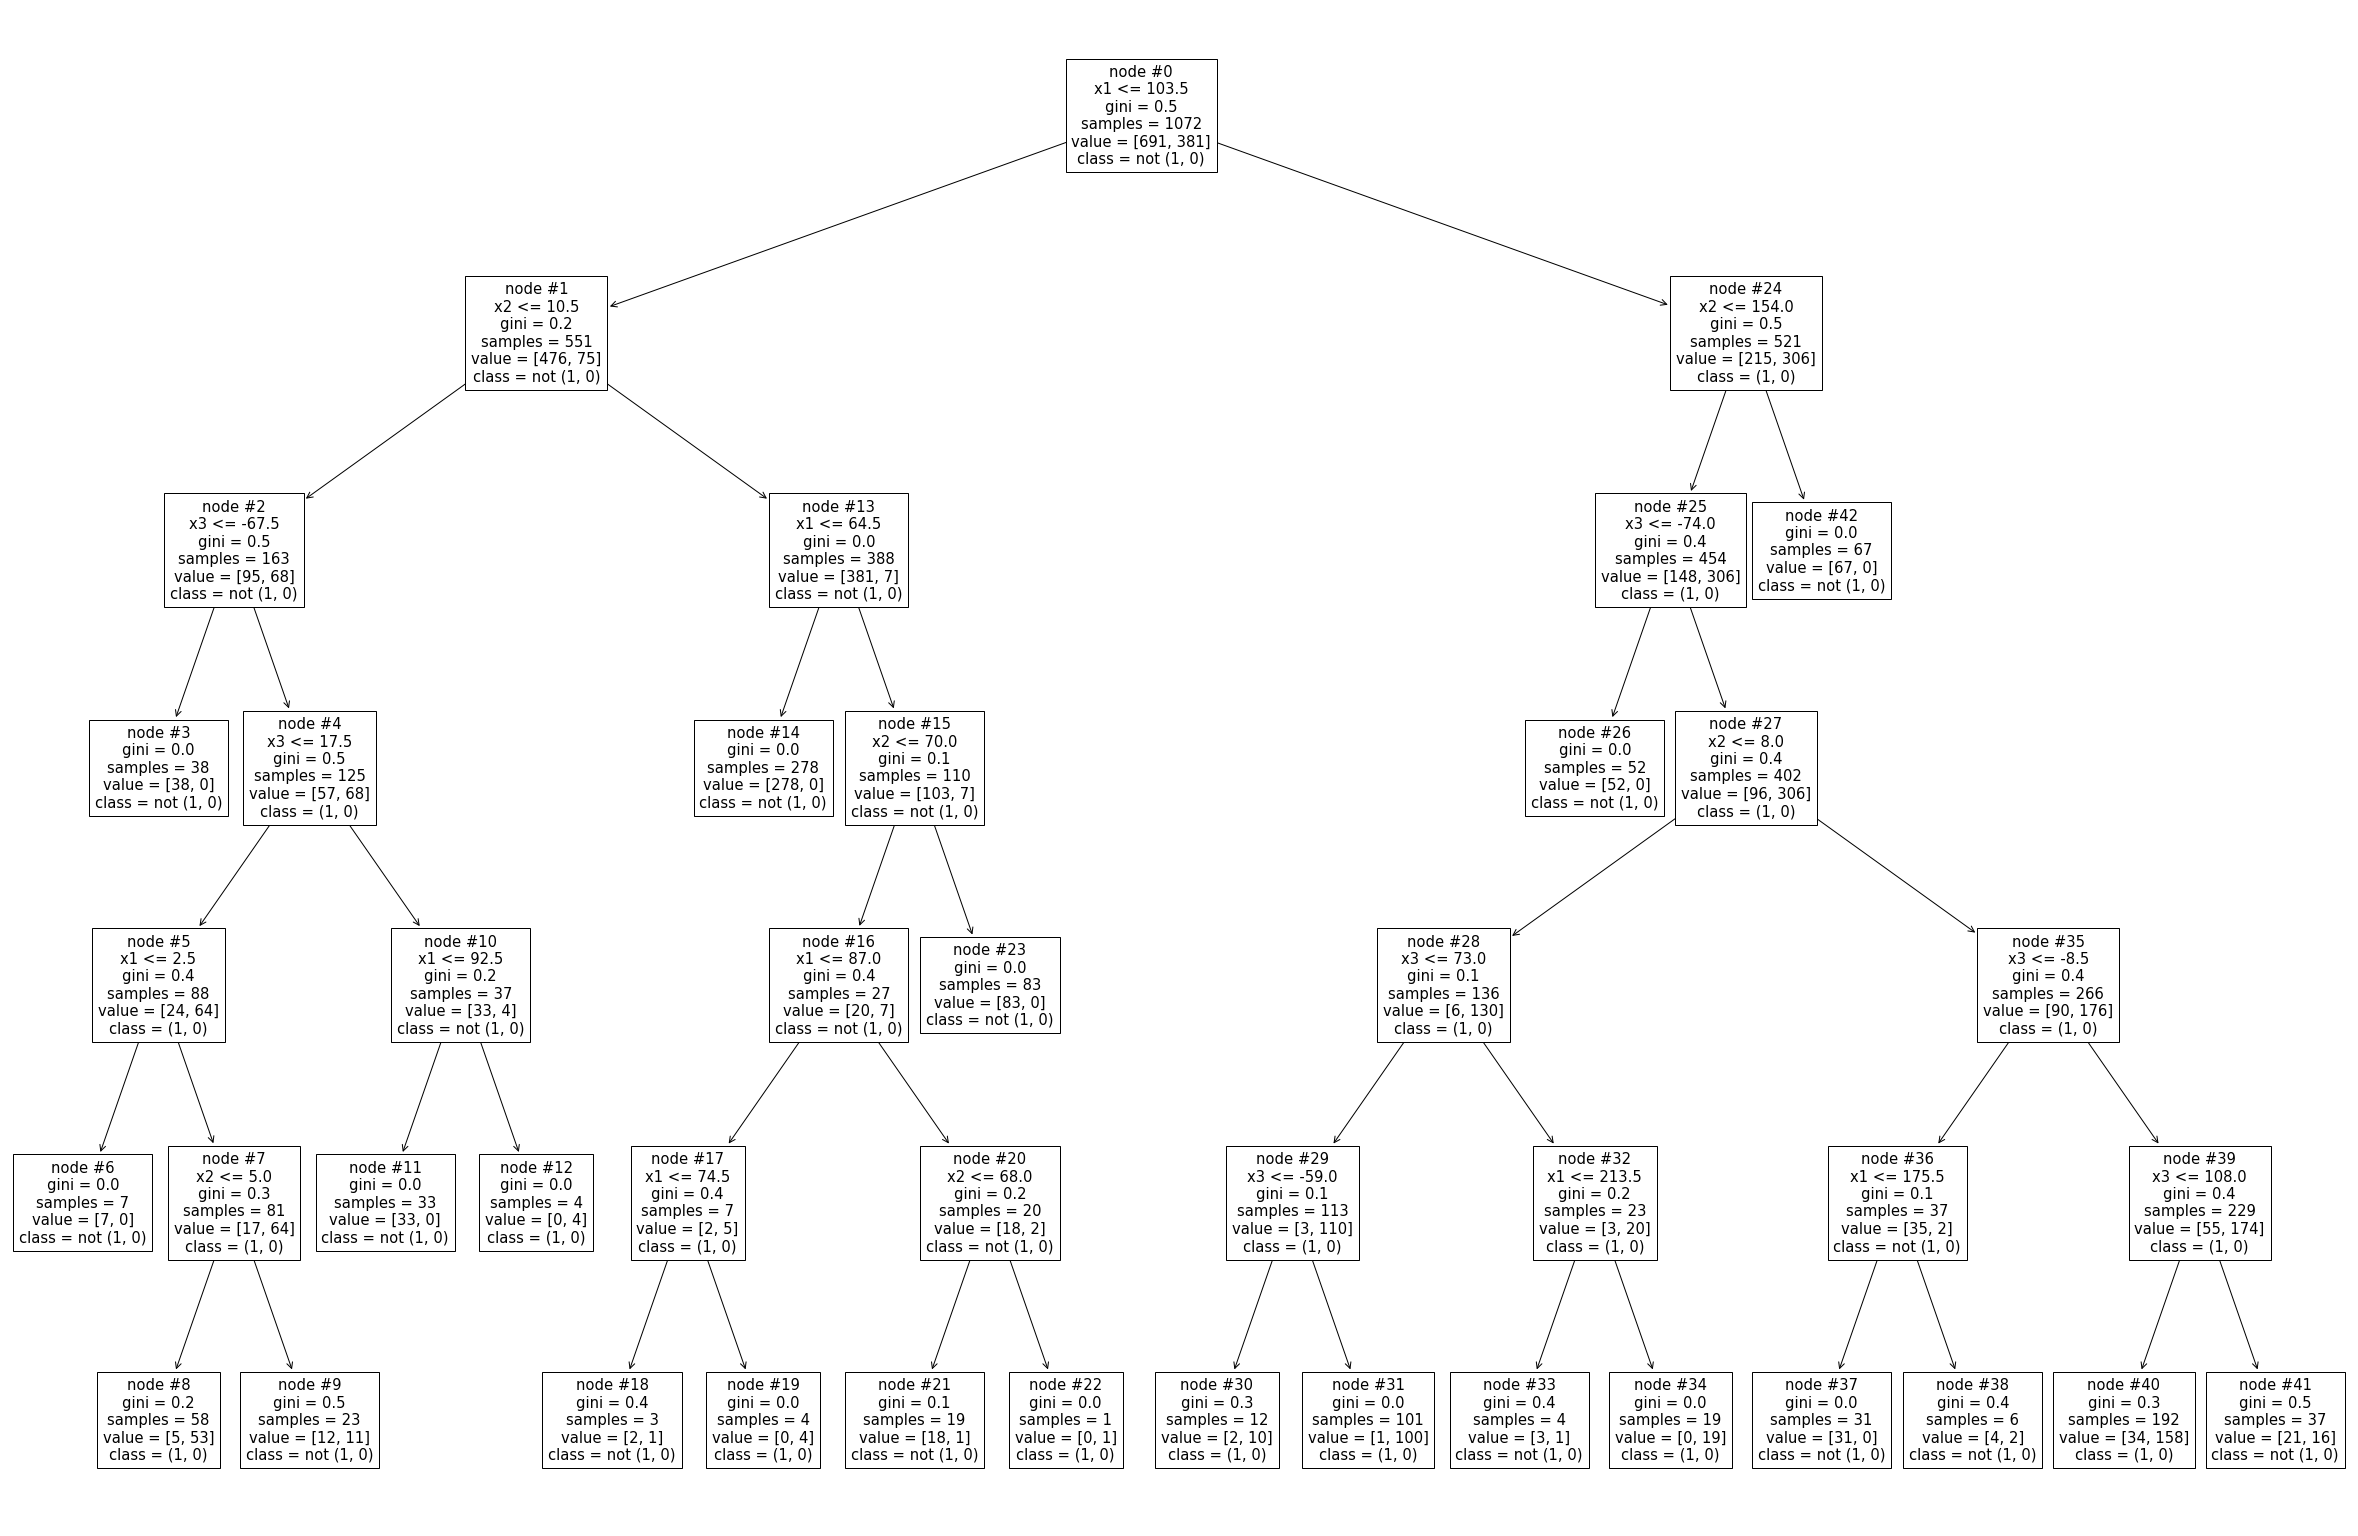

In [19]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [20]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #40: if (x1 > 103.5) and (x3 > -8.5) and (x3 <= 108.0) and (x2 > 8.0) and (x2 <= 154.0) then class: (1, 0) (158/192 instances)
node #31: if (x1 > 103.5) and (x3 > -59.0) and (x3 <= 73.0) and (x2 <= 8.0) then class: (1, 0) (100/101 instances)
node #8: if (x1 > 2.5) and (x1 <= 103.5) and (x3 > -67.5) and (x3 <= 17.5) and (x2 <= 5.0) then class: (1, 0) (53/58 instances)
node #34: if (x1 > 213.5) and (x3 > 73.0) and (x2 <= 8.0) then class: (1, 0) (19/19 instances)
node #30: if (x1 > 103.5) and (x3 > -74.0) and (x3 <= -59.0) and (x2 <= 8.0) then class: (1, 0) (10/12 instances)
node #19: if (x1 > 74.5) and (x1 <= 87.0) and (x2 > 10.5) and (x2 <= 70.0) then class: (1, 0) (4/4 instances)
node #12: if (x1 > 92.5) and (x1 <= 103.5) and (x3 > 17.5) and (x2 <= 10.5) then class: (1, 0) (4/4 instances)
node #22: if (x1 > 87.0) and (x1 <= 103.5) and (x2 > 68.0) and (x2 <= 70.0) then class: (1, 0) (1/1 instances)


In [21]:
pd.Series(class_names[y_explain]).value_counts()

not (1, 0)    691
(1, 0)        381
dtype: int64

In [22]:
(158+100+53)/381

0.8162729658792651

## $(0,1)$

In [23]:
focus_class = '(0, 1)'

In [24]:
%%time
#X_sample, _ = train_test_split(X, train_size=0.1, random_state=0)
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          focus_class=focus_class, gn_population_size=200)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 16.7 s, sys: 155 ms, total: 16.8 s
Wall time: 17.4 s


In [25]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [26]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [27]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [28]:
feature_importances = dt_feature_importance(tree)
feature_order = np.flip(np.argsort(feature_importances))

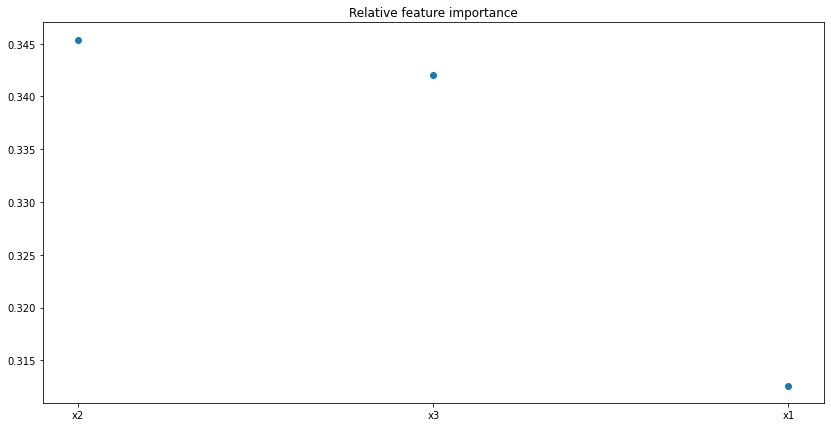

In [29]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

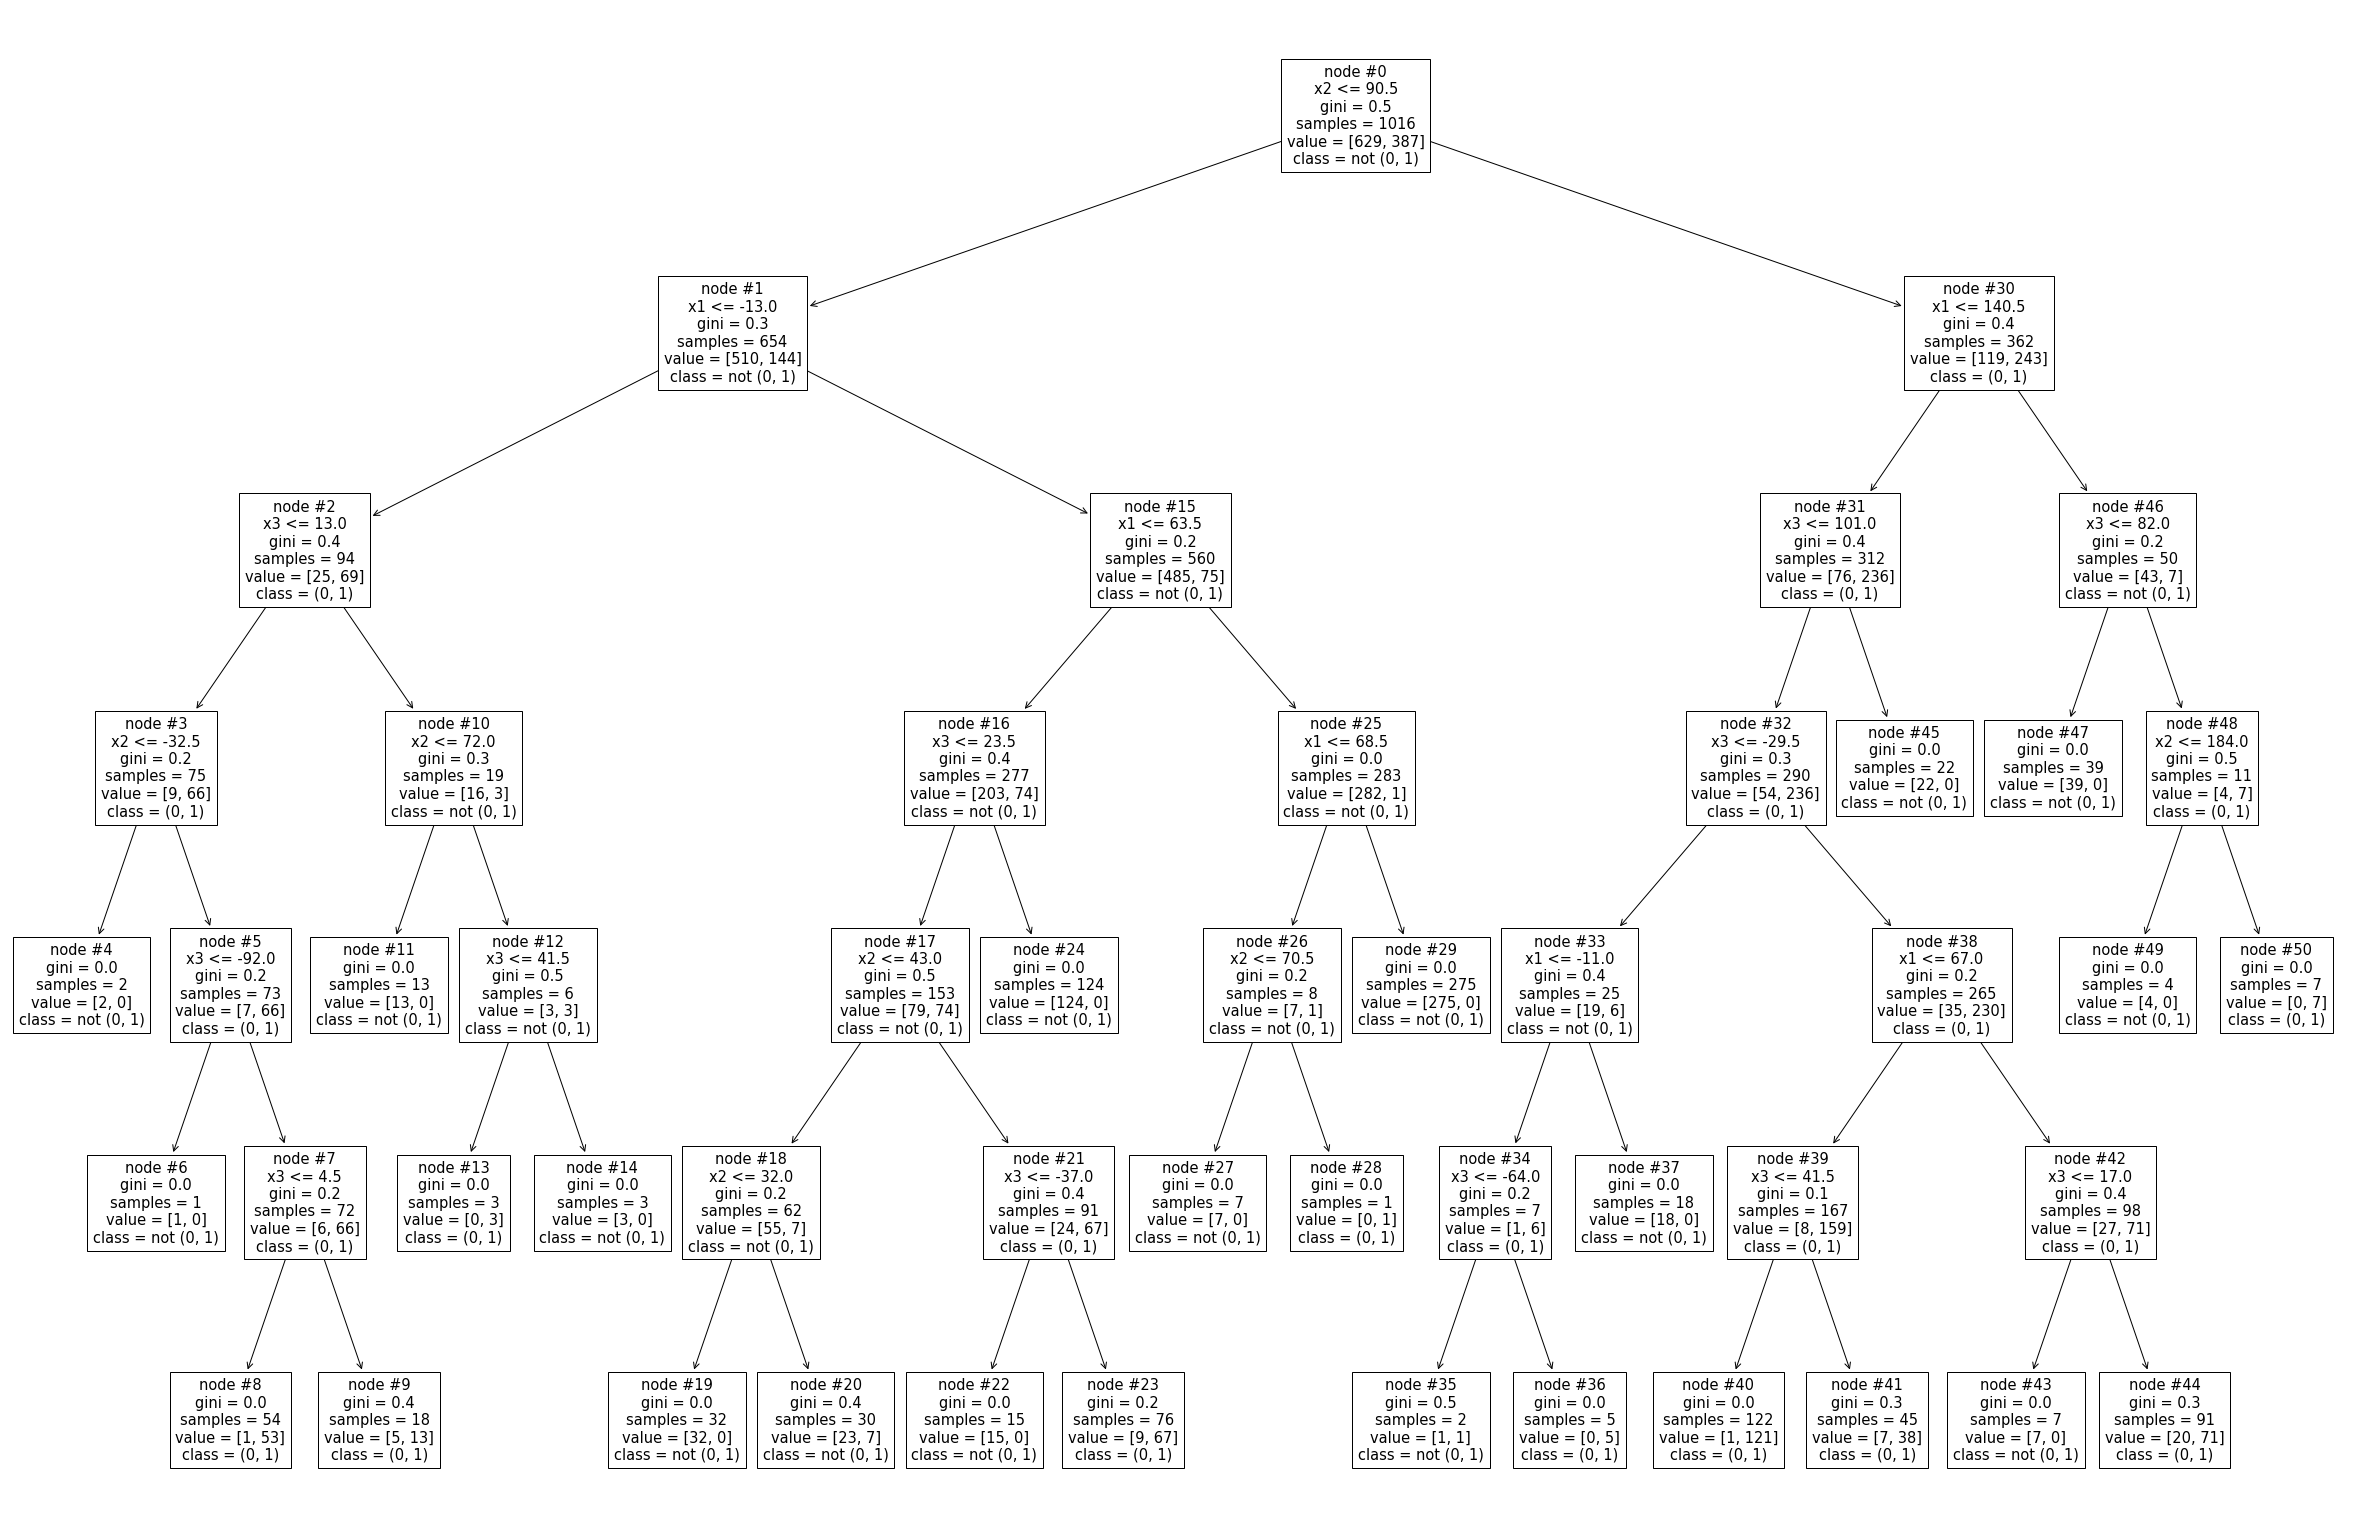

In [30]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [31]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #40: if (x2 > 90.5) and (x3 > -29.5) and (x3 <= 41.5) and (x1 <= 67.0) then class: (0, 1) (121/122 instances)
node #44: if (x2 > 90.5) and (x3 > 17.0) and (x3 <= 101.0) and (x1 > 67.0) and (x1 <= 140.5) then class: (0, 1) (71/91 instances)
node #23: if (x2 > 43.0) and (x2 <= 90.5) and (x3 > -37.0) and (x3 <= 23.5) and (x1 > -13.0) and (x1 <= 63.5) then class: (0, 1) (67/76 instances)
node #8: if (x2 > -32.5) and (x2 <= 90.5) and (x3 > -92.0) and (x3 <= 4.5) and (x1 <= -13.0) then class: (0, 1) (53/54 instances)
node #41: if (x2 > 90.5) and (x3 > 41.5) and (x3 <= 101.0) and (x1 <= 67.0) then class: (0, 1) (38/45 instances)
node #9: if (x2 > -32.5) and (x2 <= 90.5) and (x3 > 4.5) and (x3 <= 13.0) and (x1 <= -13.0) then class: (0, 1) (13/18 instances)
node #50: if (x2 > 184.0) and (x3 > 82.0) and (x1 > 140.5) then class: (0, 1) (7/7 instances)
node #36: if (x2 > 90.5) and (x3 > -64.0) and (x3 <= -29.5) and (x1 <= -11.0) then class: (0, 1) (5/5 instances)
node #13: if (x2 > 72.0) and 

In [32]:
pd.Series(class_names[y_explain]).value_counts()

not (0, 1)    629
(0, 1)        387
dtype: int64

In [33]:
(121+71+67)/387

0.6692506459948321